<a href="https://colab.research.google.com/github/Natali1599/MineriaDatos/blob/main/Proyecto2_Natali_Hern%C3%A1ndez_Cardozo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 1:
Minería de Datos - 2022
1.   Natali Hernández Cardozo- Código: 2219950



# Breve explicación de la elección del dataset: 
Conjunto de datos sobre ingresos del censo. 

#### Características:
- Sus datos pertenecen a la información del 1994.
- Tiene 48.842 datos para las variables.
- Se extrajo un conjunto de registros razonablemente limpios usando las siguientes condiciones: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)).
- La tarea de predicción es determinar si una persona gana más de 50K al año.
- Su atributo de salida es >50K, <=50K.
- Su fecha de publicación o información publicada fue 1 mayo del 1996.
- Características de conjunto de datos es Multivariado.
- Cumple la función con respecto a tareas Clasificación.
- Posee datos faltantes.

#### Número de atributos:
Información de 14 atributos:
1. edad: continuo.
2. clase de trabajo: Privado, Auto-emp-no-inc, Auto-emp-inc, Gobierno federal, Gobierno local, Gobierno estatal, Sin pago, Nunca trabajó.
3. fnlwgt: continuo.
4. educación: Licenciatura, Algo de universidad, 11.°, Graduado de HS, Escuela profesional, Assoc-acdm, Assoc-voc, 9.°, 7.° a 8.°, 12.°, Maestría, 1.° a 4.°, 10.°, Doctorado, 5.° a 6.°, Preescolar.
5. educacion-num: continua.
6. estado civil: Casado-civ-cónyuge, Divorciado, Nunca casado, Separado, Viudo, Casado-cónyuge-ausente, Casado-AF-cónyuge.
7. Ocupación: Soporte técnico, Reparación artesanal, Otros servicios, Ventas, Gerente ejecutivo, Especialidad profesional, Manipuladores-limpiadores, Inspección de máquinas, Administración administrativa, Agricultura-pesca, Transporte-mudanza, Casa privada- serv, Servicio de protección, Fuerzas Armadas.
8. parentesco: Esposa, Hijo propio, Esposo, Fuera de la familia, Otro pariente, Soltero.
9. raza: Blanco, Asiático-Pac-Isleño, Amer-Indio-Esquimal, Otro, Negro.
10. sexo: Femenino, Masculino.
11. plusvalía: continua.
12. Pérdida de capital: continua.
13. horas por semana: continuo.
14. país nativo: Estados Unidos, Camboya, Inglaterra, Puerto Rico, Canadá, Alemania, EE. UU. (Guam-USVI-etc), India, Japón, Grecia, Sur, China, Cuba, Irán, Honduras, Filipinas, Italia , Polonia, Jamaica, Vietnam, México, Portugal, Irlanda, Francia, República Dominicana, Laos, Ecuador, Taiwán, Haití, Colombia, Hungría, Guatemala, Nicaragua, Escocia, Tailandia, Yugoslavia, El-Salvador, Trinidad y Tobago, Perú, Hong , Holanda-Países Bajos.



#### Area: Social 

## Datos

In [1]:
!pip install -U -q PyDrive

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data

In [3]:
pip install altair vega_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pd.set_option('display.max_columns', None) #Mostrar todas las columnas
sns.set(rc={'figure.figsize':(12.7,8.6)})

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
base = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Minería de datos/Primer corte/adult.test', 
                 sep = ',',
                 thousands=',', decimal='.',
                 skip_blank_lines=False,
                 low_memory = False
                 )


In [7]:
base.shape

(16281, 15)

In [8]:
base.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native country    object
 50K.              object
dtype: object

# Posibles escenarios de solución en minería de datos.
¿Es un problema de aprendizaje supervisado o no supervisado? ¿Es clasificación o regresión? ¿Es clustering o reducción de dimensionalidad? Justifique su elección.

Es un aprendizaje supervisado ya que tiene como finalidad combinar las características y las etiquetas para predecir a futuros como se comportan para la  variable <50k o >50k a través de una división sociodemográfica.

Además de ser supervisado, es de clasificación, queremos crear un modelo que nos permita decidir si un nuevo punto debe ser etiquetado y cómo, con el objetivo de tener una etapa denominada predicción.

# Haga un análisis exploratorio de datos.
Haga un análisis exploratorio de datos y haga una pre-selección de variables basado en este análisis. Utilice al menos una visualización de datos por integrante de grupo. Saque sus primeras conclusiones de los datos.

In [9]:
base.describe

<bound method NDFrame.describe of        age      workclass   fnlwgt      education   education-num  \
1       25        Private   226802           11th               7   
2       38        Private    89814        HS-grad               9   
3       28      Local-gov   336951     Assoc-acdm              12   
4       44        Private   160323   Some-college              10   
5       18              ?   103497   Some-college              10   
...    ...            ...      ...            ...             ...   
16277   39        Private   215419      Bachelors              13   
16278   64              ?   321403        HS-grad               9   
16279   38        Private   374983      Bachelors              13   
16280   44        Private    83891      Bachelors              13   
16281   35   Self-emp-inc   182148      Bachelors              13   

            marital-status          occupation     relationship  \
1            Never-married   Machine-op-inspct        Own-child   
2  

#Porcesamiento de datos

In [10]:
base.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native country    0
 50K.              0
dtype: int64

In [11]:
base[base .duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native country,50K.
865,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K.
11190,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K.
11213,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K.
13849,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K.
15961,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K.


No los considero duplicados porque tienen características diferentes

# Selección de varibles a predecir / clasificar e independientes.

In [12]:
np.unique(base[" sex"])

array([' Female', ' Male'], dtype=object)

In [13]:
base[' workclass'] = base[" workclass"].map({'?':np.nan,'Federal-gov':0,' Local-gov':1, ' Never-worked':2, ' Private':3,' Self-emp-inc':4, ' Self-emp-not-inc':5, ' State-gov':6, ' Without-pay':7})
base[' education'] = base[" education"].map({' 10th':0, ' 11th':1, ' 12th':2, ' 1st-4th':3, ' 5th-6th':4, ' 7th-8th':5,' 9th':6, ' Assoc-acdm':7, ' Assoc-voc':8, ' Bachelors':9, ' Doctorate':10,' HS-grad':11, ' Masters':12, ' Preschool':13, ' Prof-school':14,' Some-college':15})
base[' marital-status'] = base[" marital-status"].map({' Divorced':0, ' Married-AF-spouse':1, ' Married-civ-spouse':2,' Married-spouse-absent':3, ' Never-married':4, ' Separated':5,' Widowed':6})
base[" occupation"]= base[" occupation"].map({' ?':np.nan, ' Adm-clerical':0, ' Armed-Forces':1, ' Craft-repair':2,' Exec-managerial':3, ' Farming-fishing':4, ' Handlers-cleaners':5,' Machine-op-inspct':6, ' Other-service':7, ' Priv-house-serv':8, ' Prof-specialty':9, ' Protective-serv':10, ' Sales':11, ' Tech-support':12,' Transport-moving':13})
base[" relationship"]=base[" relationship"].map({' Husband':0, ' Not-in-family':1, ' Other-relative':2, ' Own-child':3,' Unmarried':4, ' Wife':5})
base[" race"]=base[" race"].map({' Amer-Indian-Eskimo':0, ' Asian-Pac-Islander':1, ' Black':2, ' Other':3,' White':4})
base[" sex"]=base[" sex"].map({' Female':0, ' Male':1})
base[" native country"]=base[" native country"].map({' ?':np.nan, ' Cambodia':0, ' Canada':1, ' China':2, ' Columbia':3, ' Cuba':4,' Dominican-Republic':5, ' Ecuador':6, ' El-Salvador':7, ' England':8,' France':9, ' Germany':10, ' Greece':11, ' Guatemala':12, ' Haiti':13,' Honduras':14, ' Hong':15, ' Hungary':16, ' India':17, ' Iran':18, ' Ireland':19,  ' Italy':20, ' Jamaica':21, ' Japan':22, ' Laos':23, ' Mexico':24, ' Nicaragua':25, ' Outlying-US(Guam-USVI-etc)':26, ' Peru':27, ' Philippines':28, ' Poland':29,  ' Portugal':30, ' Puerto-Rico':31, ' Scotland':32, ' South':33, ' Taiwan':34, ' Thailand':35, ' Trinadad&Tobago':36, ' United-States':37, ' Vietnam':38,  ' Yugoslavia':39})
base[" 50K."]=base[" 50K."].map({' <=50K.':0, ' >50K.':1})

In [14]:
base.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native country,50K.
1,25,3.0,226802,1,7,4,6.0,3,2,1,0,0,40,37.0,0
2,38,3.0,89814,11,9,2,4.0,0,4,1,0,0,50,37.0,0
3,28,1.0,336951,7,12,2,10.0,0,4,1,0,0,40,37.0,1
4,44,3.0,160323,15,10,2,6.0,0,2,1,7688,0,40,37.0,1
5,18,NaN,103497,15,10,4,NaN,3,4,0,0,0,30,37.0,0


In [15]:
base.isnull().sum()

age                   0
 workclass         1435
 fnlwgt               0
 education            0
 education-num        0
 marital-status       0
 occupation         966
 relationship         0
 race                 0
 sex                  0
 capital-gain         0
 capital-loss         0
 hours-per-week       0
 native country     274
 50K.                 0
dtype: int64

In [16]:
base.dropna(subset=[" workclass"," occupation"," native country"],inplace=True)

In [17]:
base.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native country    0
 50K.              0
dtype: int64

Se toman 2.675 datos como faltantes 

In [18]:
base.shape

(14597, 15)

In [19]:
base.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native country',
       ' 50K.'],
      dtype='object')

In [20]:
x=base[['age',' education-num', ' sex',' capital-gain', ' hours-per-week']].values #variables independientes

In [21]:
y= base[' 50K.'].values #variable a predecir

In [22]:
corr_matrix = base.corr()
corr_matrix= round(corr_matrix,3)

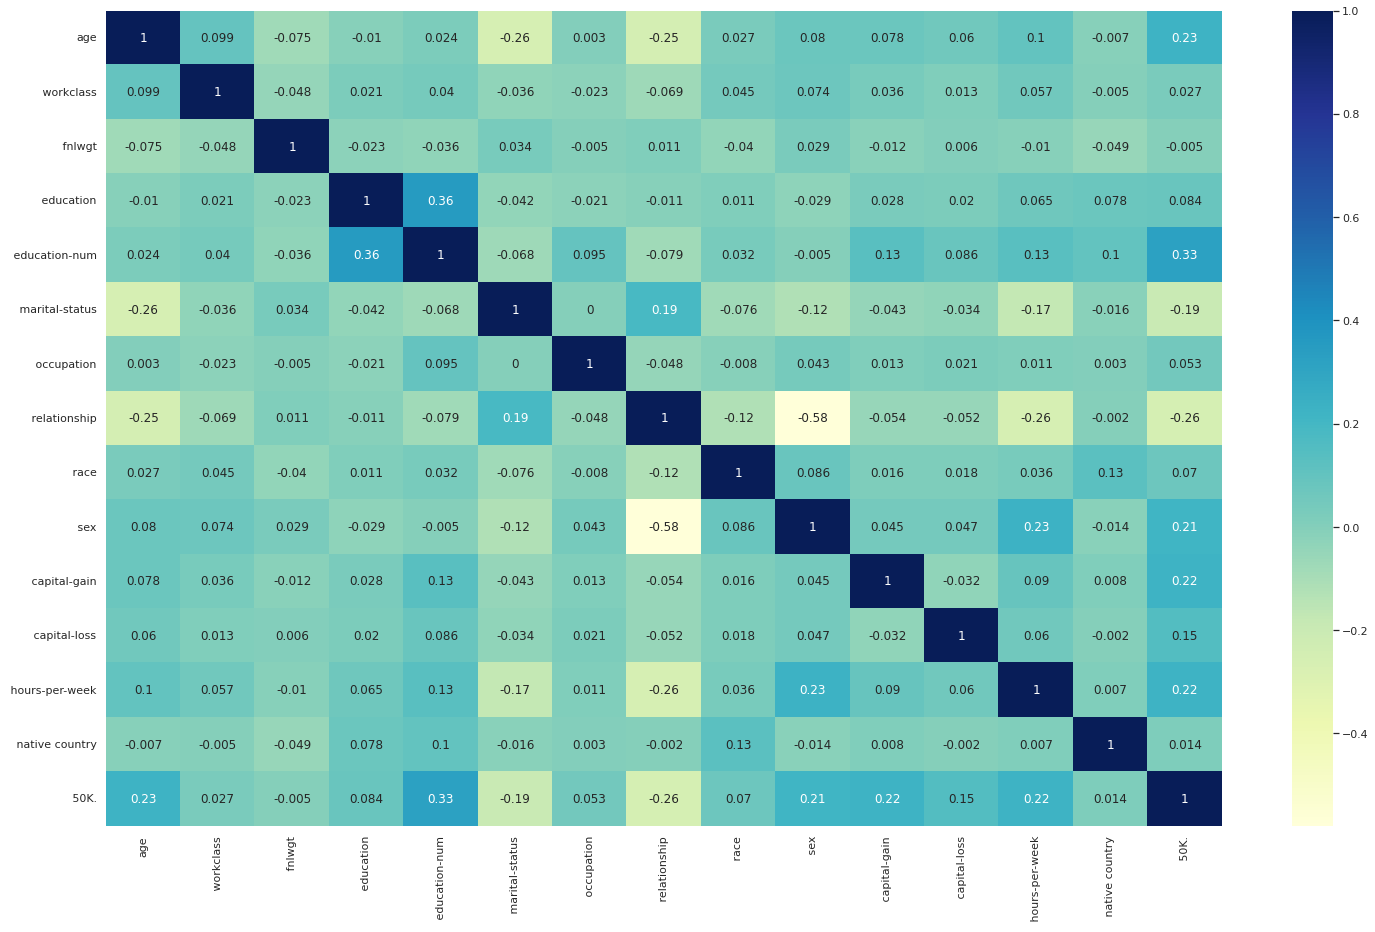

In [23]:
plt.figure(figsize=(25,15))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

Las variables que tienen una mayor correlación a 0.1 con la variable 50K. son Age, education-num,Sex,capitan-again,hours-per-week,quizás capital-loss.

#Selección de algoritmo

Se selecciono modelo de regresión logístico.

## Aplique el algoritmo realizando un modelo utilizando todo el dataset preprocesado, prediga todos
los valores del conjunto y evalúe con las métricas correspondientes al tipo de aprendizaje
supervisado. Implemente un proceso iterativo para al menos dos hiperparámetros del algoritmo.

In [24]:
# ajustar un modelo de regresión lineal
from sklearn.linear_model import LogisticRegression
linreg = LogisticRegression()
feature_cols = [' 50K.']
x=base[['age',' education-num', ' sex',' capital-gain', ' hours-per-week']].values
y= base[' 50K.'].values
linreg.fit(x, y)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [25]:
y_pred= linreg.predict(x)

Métricas

In [26]:
#Precisión
import sklearn
sklearn.metrics.accuracy_score(y, y_pred, normalize=True, sample_weight=None)

0.8174282386791807

## Aplique el algoritmo realizando un modelo utilizando una partición el dataset preprocesado (elija
entre alguno de los tipos de validación cruzada vistas en clase), prediga los valores utilizando el
conjunto de validación y evalúe con las métricas correspondientes al tipo de aprendizaje
supervisado. Implemente un proceso iterativo para al menos dos hiperparámetros del algoritmo.

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

In [28]:
x_train

array([[  51,   11,    0,    0,   45],
       [  26,    9,    1,    0,   40],
       [  24,    9,    0,    0,   40],
       ...,
       [  49,   11,    1, 7688,   60],
       [  28,    4,    0,    0,   40],
       [  21,    9,    1,    0,   35]])

In [29]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [31]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("Precisión :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
Precisión : 0.8211819884193196


In [32]:
logreg2=LogisticRegression(C=0.1,penalty="l2")
logreg2.fit(x_train,y_train)
print("score",logreg2.score(x_test,y_test))

score 0.8095890410958904


## Matriz de confusión

In [33]:
# Predecir la variable respuesta
y_pred = logreg2.predict(x_test)

In [34]:
print("Variable real:")
print(np.array(np.unique(y_test, return_counts=True)).T)
print("Variable predicha:" )
print(np.array(np.unique(y_pred, return_counts=True)).T)

Variable real:
[[   0 3298]
 [   1 1082]]
Variable predicha:
[[   0 3742]
 [   1  638]]


In [35]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[3103,  195],
       [ 639,  443]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


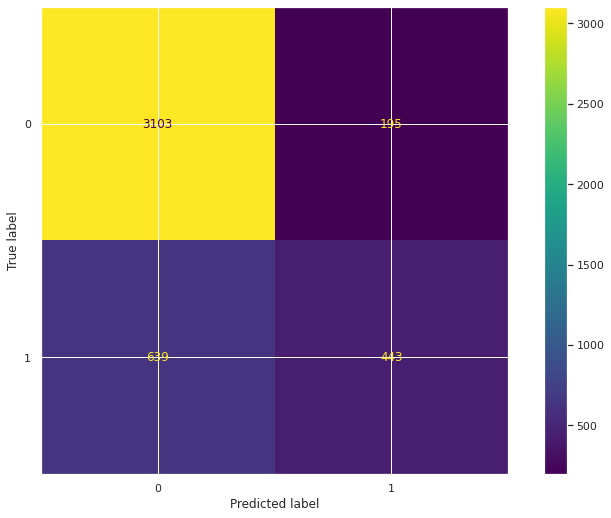

In [36]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg2, x_test, y_test,values_format = '.0f')  
plt.show()

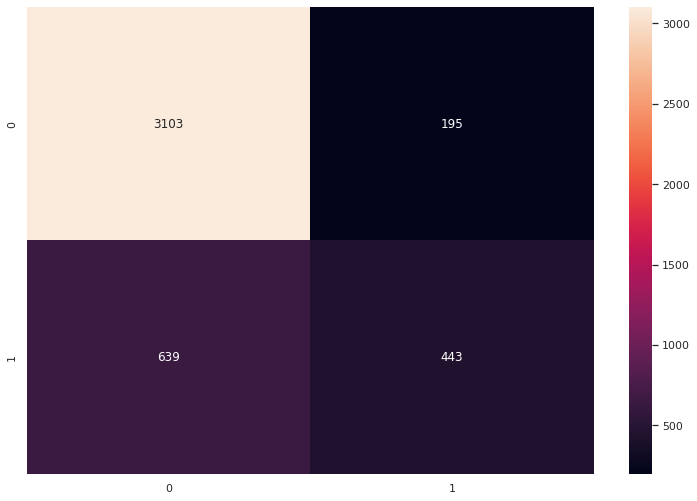

In [37]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True, fmt='.0f')

In [38]:
from sklearn import metrics
print('Exactitud:', metrics.accuracy_score(y_test, y_pred))

Exactitud: 0.8095890410958904


In [39]:
print('Recall:', metrics.recall_score(y_test, y_pred))

Recall: 0.40942698706099817


## Justifique:


 ¿Por qué se selecciona ese algoritmo?
 Por aprendizaje de clase, además el modelo logístico tienen una alta interpretabilidad a comparación de otros algoritmos como el naive bayes(Probabilidad condicional,asume que todas las observaciones son independientes)
), support vector machine (Transformación de la sombra).


¿Qué métricas se usaron? Presición, Exactitud, Recuperación ymtriz de confusión.

¿Qué modelo seleccionaría según el rendimiento de los dos modelos seleccionados? 
Con los hiperparametro c=0.1 y l2, gracias a la grilla.

¿Qué mejoraría en su modelo? 
Rta. Probaría más modelos de clasificación haber si alguno tiene mejor desempeño.


# Bibliografía:
Kohavi. R, Becker. B. "Conjunto
de datos de ingresos del censo", Conferencia Internacional sobre Sistemas Inteligentes Avanzados para el Desarrollo Sostenible, Data Mining and Visualization, 1 Mayo del 1996. https://archive.ics.uci.edu/ml/datasets/Census+Income 

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
